In [11]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjusts the configuration of the plots we will create



#Read in the data

df= pd.read_csv(r'/Users/jae/Downloads/movies.csv')

In [2]:
#Look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [12]:
#Looking for missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [14]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
#Convert data types of columns

df = df.fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0.0    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                          0     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      0.0  
7666          0                          0    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [45]:
#Creates correct year column
df['yearcorrect'] = df['released'].str.rsplit(',').str[-1].str[:5]


In [36]:
df = df.sort_values (by = ['gross'], inplace = False, ascending = False)

In [30]:
pd.set_option('display.max_rows', None)

In [62]:
df.head()

name  rating  genre  year  \
5445                                      Avatar       6      0  2009   
7445                           Avengers: Endgame       6      0  2019   
3045                                     Titanic       6      6  1997   
6663  Star Wars: Episode VII - The Force Awakens       6      0  2015   
7244                      Avengers: Infinity War       6      0  2018   

      released  score      votes  director  writer  star  country     budget  \
5445       697    7.8  1100000.0      1155    1779  2335       56  237000000   
7445       184    8.4   903000.0       162     744  2242       56  356000000   
3045       705    7.8  1100000.0      1155    1779  1596       56  200000000   
6663       699    7.8   876000.0      1125    2551   525       56  245000000   
7244       193    8.4   897000.0       162     744  2242       56  321000000   

           gross  company  runtime  yearcorrect  
5445  2847246203     2254    162.0           29  
7445  2797501328     1607    181.0           39  
3045  2201647264     2254    194.0           17  
6663  2069521700     1541    138.0           35  
7244  2048359754     1607    149.0           38

In [63]:
#Dropping Duplicates

df['company'].drop_duplicates()
df.head()

name  rating  genre  year  \
5445                                      Avatar       6      0  2009   
7445                           Avengers: Endgame       6      0  2019   
3045                                     Titanic       6      6  1997   
6663  Star Wars: Episode VII - The Force Awakens       6      0  2015   
7244                      Avengers: Infinity War       6      0  2018   

      released  score      votes  director  writer  star  country     budget  \
5445       697    7.8  1100000.0      1155    1779  2335       56  237000000   
7445       184    8.4   903000.0       162     744  2242       56  356000000   
3045       705    7.8  1100000.0      1155    1779  1596       56  200000000   
6663       699    7.8   876000.0      1125    2551   525       56  245000000   
7244       193    8.4   897000.0       162     744  2242       56  321000000   

           gross  company  runtime  yearcorrect  
5445  2847246203     2254    162.0           29  
7445  2797501328     1607    181.0           39  
3045  2201647264     2254    194.0           17  
6663  2069521700     1541    138.0           35  
7244  2048359754     1607    149.0           38

In [34]:
# Hypothesis: Budget and Company has a high correlation with revenue


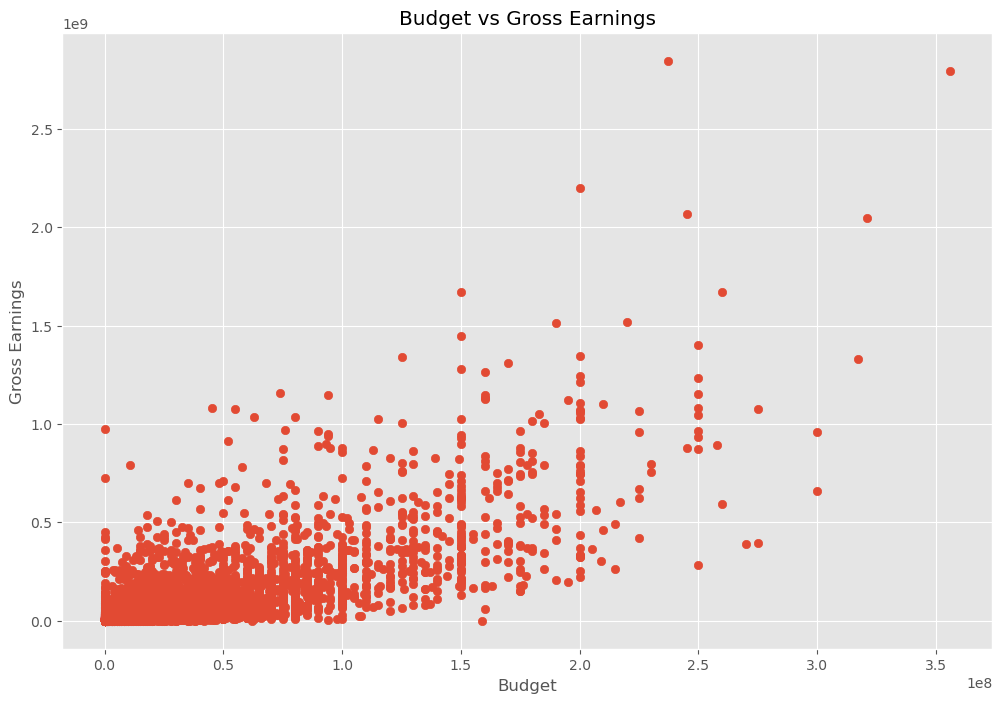

In [39]:
#Scatter plot with budget v Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [37]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

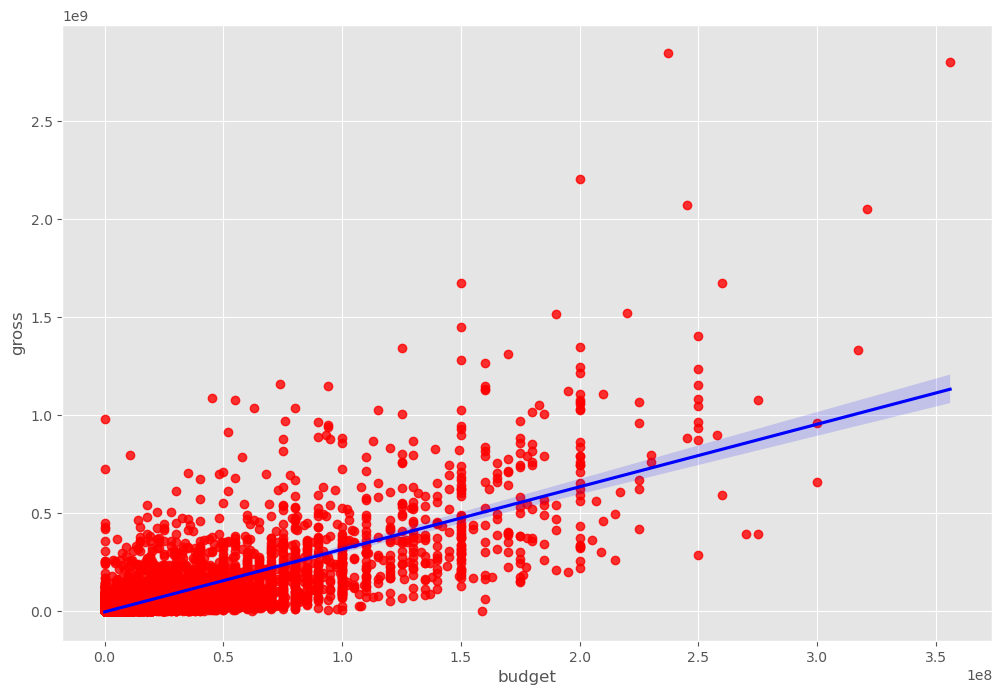

In [42]:
#Plot budget vs Gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})


In [43]:
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

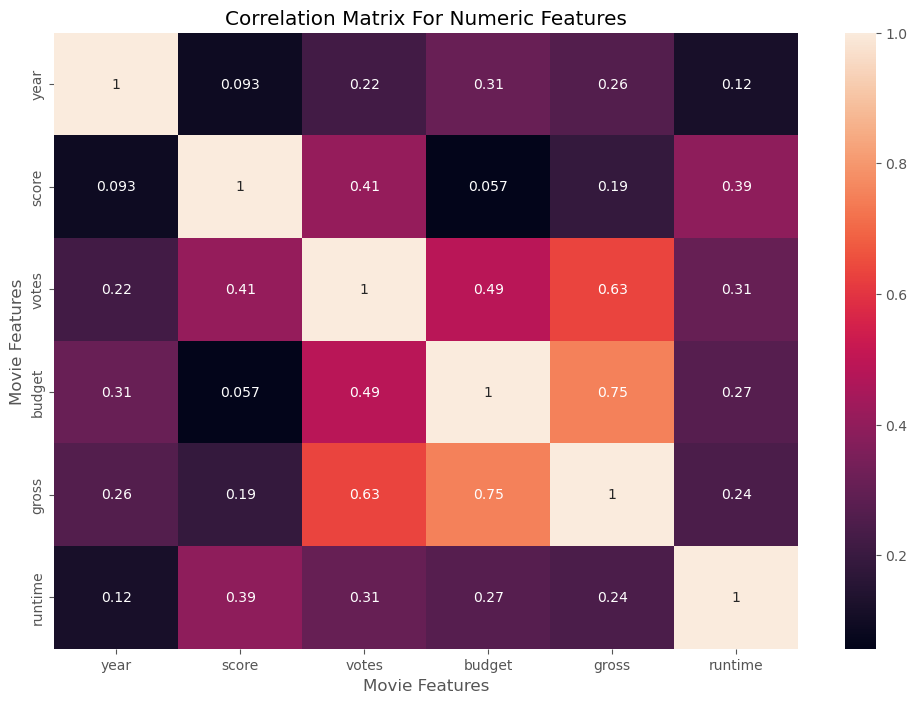

In [48]:
# Creating a Correlation Matrix for Visualizations

correlation_matrix =df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [49]:
# Looking at Correlation with Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [56]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  \
5445                                             Avatar       6      0  2009   
7445                                  Avengers: Endgame       6      0  2019   
3045                                            Titanic       6      6  1997   
6663         Star Wars: Episode VII - The Force Awakens       6      0  2015   
7244                             Avengers: Infinity War       6      0  2018   
7480                                      The Lion King       5      2  2019   
6653                                     Jurassic World       6      0  2015   
6043                                       The Avengers       6      0  2012   
6646                                          Furious 7       6      0  2015   
7494                                          Frozen II       5      2  2019   
6644                            Avengers: Age of Ultron       6      0  2015   
7247                                      Black Panther       6      0  2018   
5845       Harry Potter and the Deathly Hallows: Part 2       6      1  2011   
7075            Star Wars: Episode VIII - The Last Jedi       6      0  2017   
7271                     Jurassic World: Fallen Kingdom       6      0  2018   
6262                                             Frozen       5      2  2013   
7072                               Beauty and the Beast       5      7  2017   
7281                                      Incredibles 2       5      2  2018   
7055                            The Fate of the Furious       6      0  2017   
6244                                         Iron Man 3       6      0  2013   
6688                                            Minions       5      2  2015   
6846                         Captain America: Civil War       6      0  2016   
7250                                            Aquaman       6      0  2018   
4245      The Lord of the Rings: The Return of the King       6      0  2003   
7458                          Spider-Man: Far from Home       6      0  2019   
7456                                     Captain Marvel       6      0  2019   
5878                     Transformers: Dark of the Moon       6      0  2011   
6059                                            Skyfall       6      0  2012   
6494                    Transformers: Age of Extinction       6      0  2014   
2448                                      The Lion King       2      2  1994   
6047                              The Dark Knight Rises       6      0  2012   
7463      Star Wars: Episode IX - The Rise of Skywalker       6      0  2019   
7450                                              Joker       7      5  2019   
7488                                        Toy Story 4       2      2  2019   
5685                                        Toy Story 3       2      2  2010   
4852         Pirates of the Caribbean: Dead Man's Chest       6      0  2006   
6869                       Rogue One: A Star Wars Story       6      0  2016   
7481                                            Aladdin       5      1  2019   
5860        Pirates of the Caribbean: on Stranger Tides       6      0  2011   
7140                                    Despicable Me 3       5      2  2017   
2245                                      Jurassic Park       6      0  1993   
6908                                       Finding Dory       5      2  2016   
3451          Star Wars: Episode I - The Phantom Menace       5      0  1999   
5667                                Alice in Wonderland       5      1  2010   
6863                                           Zootopia       5      2  2016   
6045                  The Hobbit: An Unexpected Journey       6      1  2012   
3843              Harry Potter and the Sorcerer's Stone       5      1  2001   
5243                                    The Dark Knight       6      0  2008   
5652       Harry Potter and the Deathly Hallows: Part 1       6      1  2010   
6311                                    Despicable 

<function matplotlib.pyplot.show(close=None, block=None)>

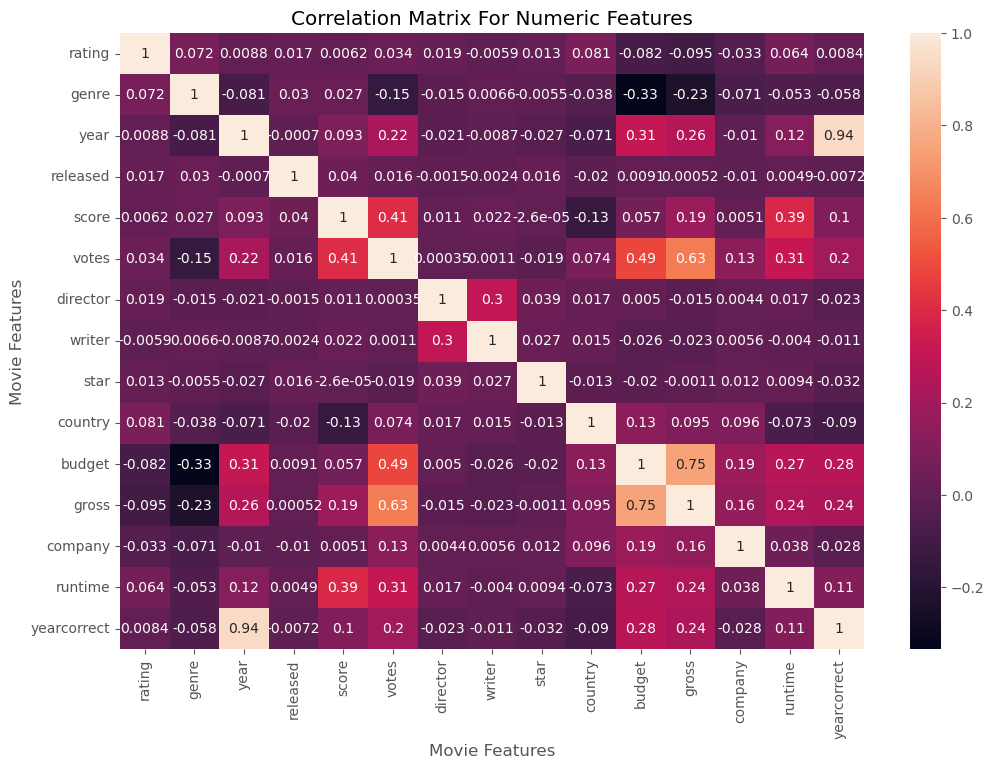

In [57]:
#Correlation matrix for every field except names

correlation_matrix =df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [58]:
df_numerized.corr()

rating     genre      year  released     score     votes  \
rating       1.000000  0.072423  0.008779  0.016613  0.006192  0.033743   
genre        0.072423  1.000000 -0.081261  0.029822  0.027384 -0.145296   
year         0.008779 -0.081261  1.000000 -0.000695  0.092616  0.222427   
released     0.016613  0.029822 -0.000695  1.000000  0.039814  0.015878   
score        0.006192  0.027384  0.092616  0.039814  1.000000  0.407101   
votes        0.033743 -0.145296  0.222427  0.015878  0.407101  1.000000   
director     0.019483 -0.015258 -0.020795 -0.001478  0.010568  0.000349   
writer      -0.005921  0.006567 -0.008656 -0.002404  0.022098  0.001127   
star         0.013405 -0.005477 -0.027242  0.015777 -0.000026 -0.019146   
country      0.081244 -0.037615 -0.070938 -0.020427 -0.133346  0.073525   
budget      -0.081939 -0.334021  0.309212  0.009145  0.056863  0.486931   
gross       -0.095450 -0.234297  0.261900  0.000519  0.186012  0.632870   
company     -0.032943 -0.071067 -0.010431 -0.010474  0.005081  0.133457   
runtime      0.064133 -0.052914  0.116358  0.004852  0.394564  0.306984   
yearcorrect  0.008371 -0.057906  0.940995 -0.007246  0.101513  0.198174   

             director    writer      star   country    budget     gross  \
rating       0.019483 -0.005921  0.013405  0.081244 -0.081939 -0.095450   
genre       -0.015258  0.006567 -0.005477 -0.037615 -0.334021 -0.234297   
year        -0.020795 -0.008656 -0.027242 -0.070938  0.309212  0.261900   
released    -0.001478 -0.002404  0.015777 -0.020427  0.009145  0.000519   
score        0.010568  0.022098 -0.000026 -0.133346  0.056863  0.186012   
votes        0.000349  0.001127 -0.019146  0.073525  0.486931  0.632870   
director     1.000000  0.299067  0.039234  0.017490  0.004976 -0.014916   
writer       0.299067  1.000000  0.027245  0.015343 -0.025911 -0.022997   
star         0.039234  0.027245  1.000000 -0.012998 -0.019952 -0.001129   
country      0.017490  0.015343 -0.012998  1.000000  0.131720  0.095325   
budget       0.004976 -0.025911 -0.019952  0.131720  1.000000  0.750157   
gross       -0.014916 -0.022997 -0.001129  0.095325  0.750157  1.000000   
company      0.004404  0.005646  0.012442  0.095548  0.186474  0.156745   
runtime      0.017062 -0.004036  0.009418 -0.073319  0.268372  0.244339   
yearcorrect -0.023166 -0.010583 -0.031902 -0.090351  0.275115  0.235768   

              company   runtime  yearcorrect  
rating      -0.032943  0.064133     0.008371  
genre       -0.071067 -0.052914    -0.057906  
year        -0.010431  0.116358     0.940995  
released    -0.010474  0.004852    -0.007246  
score        0.005081  0.394564     0.101513  
votes        0.133457  0.306984     0.198174  
director     0.004404  0.017062    -0.023166  
writer       0.005646 -0.004036    -0.010583  
star         0.012442  0.009418    -0.031902  
country      0.095548 -0.073319    -0.090351  
budget       0.186474  0.268372     0.275115  
gross        0.156745  0.244339     0.235768  
company      1.000000  0.037537    -0.028366  
runtime      0.037537  1.000000     0.111114  
yearcorrect -0.028366  0.111114     1.000000

In [59]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating       rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.081939
             gross         -0.095450
             company       -0.032943
             runtime        0.064133
             yearcorrect    0.008371
genre        rating         0.072423
             genre          1.000000
             year          -0.081261
             released       0.029822
             score          0.027384
             votes         -0.145296
             director      -0.015258
             writer         0.006567
             star          -0.005477
             country       -0.037615
             budget        -0.334021
             gross         -0.234297
 

In [60]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145296
votes        genre         -0.145296
country      score         -0.133346
score        country       -0.133346
gross        rating        -0.095450
rating       gross         -0.095450
yearcorrect  country       -0.090351
country      yearcorrect   -0.090351
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.073319
runtime      country       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
yearcorrect  genre         -0.057906
genre        yearcorrect   -0.057906
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.037615
g

In [61]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.940995
yearcorrect  year           0.940995
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and Budget Have the highest Correlation to Gross Earnings 

